## Atividade Prática

Data: 21/04/2021

Envolve Pré-processamento e os métodos de regressão DecisionTreeRegressor
Atividade avaliativa: 10 pontos.

Detalhes da atividade

O objetivo desta atividade é você desenvolver um projeto de aprendizagem de maquina aplicando o que métodos e tecnicas estudados nas aulas anteriores. A problematica consiste em realizar a previsão de preço de um automóvel.


### 1.1 Carregar os dados no Colab

* Fazer o download utilizando comandos no Notebook


In [1]:
#!gdown https://drive.google.com/uc?id=16HgSv-IdXNyaesHlkpcYayqJGk2YhP5S

### 1.2 Leitura dos dados

Os dados da base de dados estão contidos no arquivo autos.csv


In [2]:
# Importando as bibliotecas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
base_path_filename = '/home/mariohn/Documentos/VSCODE/Datasets/autos.csv'

In [3]:
base = pd.read_csv(base_path_filename, encoding="ISO-8859-1")
base.shape

(371528, 20)

In [4]:
base.keys() # os atributos

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
base.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 1.3 Exploração  do dataset e pré-processemento

Terefas:

 - A. Verificar dados duplicados e corrigir se necessario
 - B. Verificar dados com valores faltantes e remover/corrigir se necessário
 - C. Analisar e eliminar atributos desnecessarios para o projeto
 - C.1 Algoritmo de Classificação após a seleção de caracterisiticas
 - D. Particionar os dados para iniciar o treinamento de um algoritimo de aprendizagem de máquina.
 - E. Algoritmos de Classificação

Tarefa A

 - Nesta tarefa, o objetivo é eliminar os registros duplicados. A função **duplicated()** do pandas é uma mão na roda...

In [6]:
# Verificar a quantidade de instâncias duplicadas.
sum(base.duplicated())

4

In [7]:
# apresente os valores que estão duplicados
base[base.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [8]:
# Agora que conhecemos os dados duplicados, vamos removê-los
base.drop_duplicates(inplace=True)
base.shape

(371524, 20)

Tarefa B

- Só recordando, aqui você precisará verificar dados com valores faltantes e remover/corrigir se necessário.

- Uma maneira de verificar se existem valores faltantes com pandas é aplicação da das funções *isnull().sum()*. Testa aí... 

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371524 non-null  object
 1   name                 371524 non-null  object
 2   seller               371524 non-null  object
 3   offerType            371524 non-null  object
 4   price                371524 non-null  int64 
 5   abtest               371524 non-null  object
 6   vehicleType          333655 non-null  object
 7   yearOfRegistration   371524 non-null  int64 
 8   gearbox              351315 non-null  object
 9   powerPS              371524 non-null  int64 
 10  model                351040 non-null  object
 11  kilometer            371524 non-null  int64 
 12  monthOfRegistration  371524 non-null  int64 
 13  fuelType             338138 non-null  object
 14  brand                371524 non-null  object
 15  notRepairedDamage    299464 non-nu

In [10]:
base.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

- Caso queria visualizar, use o pyplot junto ao seaborn (sns) (apelidado de plt):



In [11]:
# import seaborn as sns

# plt.figure(figsize = (30,8))

# sns.heatmap(base.isnull(),
#             yticklabels = 0,
#             cbar = False)

# plt.title('Visão geral dos valores faltantes')
# plt.xlabel('Colunas')
# plt.show()

In [12]:
# Exemplo de como filtrar um dataframe por uma coluna que que possui valores faltantes
base.loc[pd.isnull(base.vehicleType)]# mostra as rows com valores nulos no atributo vehicleType

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
16,2016-04-01 12:46:46,Polo_6n_1_4,privat,Angebot,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
22,2016-03-23 14:52:51,Opel_Meriva_1.Hand_TÜV_3.2018,privat,Angebot,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein,2016-03-23 00:00:00,0,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,Citroen_C4_Grand_Picasso.,privat,Angebot,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein,2016-03-10 00:00:00,0,31139,2016-03-16 09:16:46
31,2016-03-29 16:57:02,Renault_clio_1.2_TÜV_07/2016,privat,Angebot,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN,2016-03-29 00:00:00,0,37075,2016-03-29 17:43:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371504,2016-03-07 17:06:35,220_cdi_Benz,privat,Angebot,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,61169,2016-03-08 21:28:38
371509,2016-03-11 23:40:32,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,privat,Angebot,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein,2016-03-11 00:00:00,0,87700,2016-03-12 14:16:51
371519,2016-03-09 13:37:43,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,privat,Angebot,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein,2016-03-09 00:00:00,0,51371,2016-03-13 01:44:13
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49


- uma vez que jugue não ser possível acrescentar informações sem adicionar desbalanceamento à base, apenas remova todos os valores faltantes. A função **dropna** faz isso.

In [13]:
base.dropna(inplace=True)

In [14]:
base.shape

(260952, 20)

In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          260952 non-null  object
 1   name                 260952 non-null  object
 2   seller               260952 non-null  object
 3   offerType            260952 non-null  object
 4   price                260952 non-null  int64 
 5   abtest               260952 non-null  object
 6   vehicleType          260952 non-null  object
 7   yearOfRegistration   260952 non-null  int64 
 8   gearbox              260952 non-null  object
 9   powerPS              260952 non-null  int64 
 10  model                260952 non-null  object
 11  kilometer            260952 non-null  int64 
 12  monthOfRegistration  260952 non-null  int64 
 13  fuelType             260952 non-null  object
 14  brand                260952 non-null  object
 15  notRepairedDamage    260952 non-nu

Tarefa C - Analisar e eliminar atributos desnecessarios para o projeto


In [16]:
# remoção de atributos que não irão ajudar na previsão do preço
lista_atributos = ['dateCrawled','seller','offerType','nrOfPictures','postalCode','lastSeen','dateCreated','name']

In [17]:
base.shape

(260952, 20)

In [18]:
# remoção de alguns atributos da base
base.drop(lista_atributos, axis=1, inplace=True)
base.shape

(260952, 12)

Tarefa C.1 - Analisar e eliminar atributos desnecessarios para o projeto

### Seleção univariada

Os testes estatísticos podem ser usados ​​para selecionar os recursos que têm a relação mais forte com a variável de saída.



In [19]:
colunas = base.columns
colunas

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

In [20]:
base

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371521,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


In [21]:
# como serão avaliados os preços, os rótulos serão do tipo 'price'
feats = base[['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']].copy()
labels = base[['price']].copy()

In [22]:
feats.dtypes

abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [23]:
# Converte os tipos de colunas para categorias
feats[['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']] = feats[['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']].astype('category')

In [24]:
feats.dtypes

abtest                 category
vehicleType            category
yearOfRegistration        int64
gearbox                category
powerPS                   int64
model                  category
kilometer                 int64
monthOfRegistration       int64
fuelType               category
brand                  category
notRepairedDamage      category
dtype: object

In [25]:
# atribui o valor numerico as colunas de categorias
feats.loc[:,'abtest'] = feats.loc[:,'abtest'].cat.codes
feats.loc[:,'vehicleType'] = feats.loc[:,'vehicleType'].cat.codes
feats.loc[:,'gearbox'] = feats.loc[:,'gearbox'].cat.codes
feats.loc[:,'model'] = feats.loc[:,'model'].cat.codes
feats.loc[:,'fuelType'] = feats.loc[:,'fuelType'].cat.codes
feats.loc[:,'brand'] = feats.loc[:,'brand'].cat.codes
feats.loc[:,'notRepairedDamage'] = feats.loc[:,'notRepairedDamage'].cat.codes
feats.head()

/tmp/ipykernel_4850/1957579004.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  feats.loc[:,'abtest'] = feats.loc[:,'abtest'].cat.codes
/tmp/ipykernel_4850/1957579004.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  feats.loc[:,'vehicleType'] = feats.loc[:,'vehicleType'].cat.codes
/tmp/ipykernel_4850/1957579004.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if 

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1,4,2001,1,75,118,150000,6,1,37,1
4,1,4,2008,1,69,103,90000,7,3,31,1
5,1,6,1995,1,102,11,150000,10,1,2,0
6,1,2,2004,1,109,8,150000,8,1,25,1
7,1,6,1980,1,50,40,40000,7,1,37,1


In [26]:
# recupera os valores me nupy
feats = feats.values
labels = labels.values

### Identificação automática dos atributos

#### Usando o SelectBest

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [28]:
# serão buscados os 6 melhores atributos que melhor define o problema 
test_labels = SelectKBest(score_func=f_classif, k=6)

In [29]:
fit_labels = test_labels.fit(feats, labels.ravel())

In [30]:
# apresenta o score de cada característica em relação ao rótulo
fit_labels.scores_

array([ 1.01333034,  1.59703272, 32.81766729,  8.2109374 ,  6.26920024,
        1.41560328, 18.46107318,  1.41380609,  5.81894686,  2.265907  ,
        9.55411987])

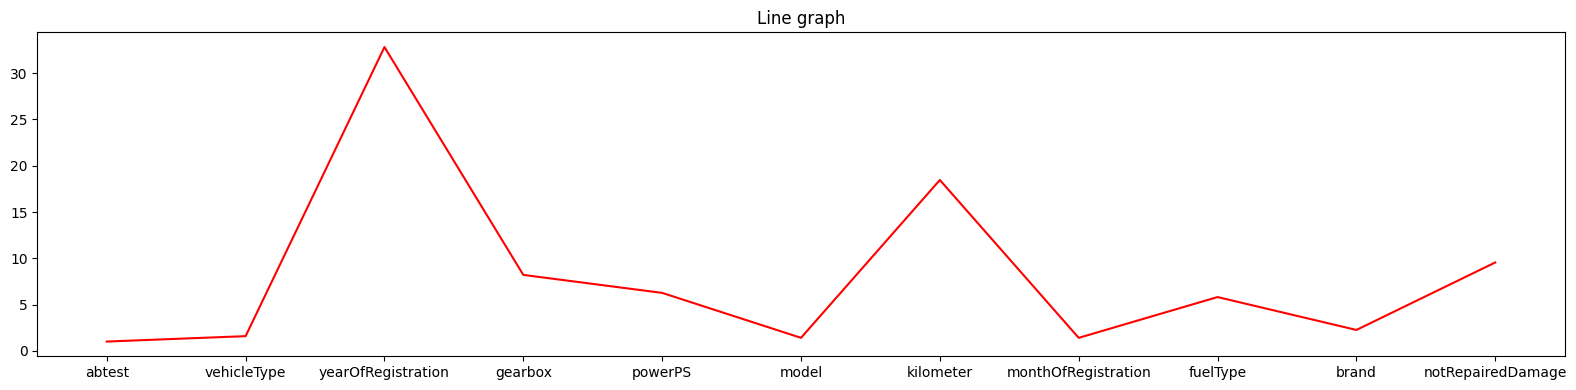

In [39]:
#plotando a importancia das features em relacao ao label
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

y = fit_labels.scores_
x = base.columns[1:]

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()

In [40]:
# das características apresentadas acima, seleciona as 6 mais relevantes
feats_best = fit_labels.transform(feats)
# apresenta as 10 primeiras amostras
feats_best[:10, :]

array([[  2001,      1,     75, 150000,      1,      1],
       [  2008,      1,     69,  90000,      3,      1],
       [  1995,      1,    102, 150000,      1,      0],
       [  2004,      1,    109, 150000,      1,      1],
       [  1980,      1,     50,  40000,      1,      1],
       [  2004,      1,    105, 150000,      1,      1],
       [  2005,      1,    140, 150000,      3,      0],
       [  2011,      1,    190,  70000,      3,      1],
       [  2004,      0,     75, 150000,      1,      1],
       [  2007,      1,    136, 150000,      3,      1]])

##### para descobrir quais foram as colunas selecionadas? 

In [41]:
col_selects = fit_labels.get_support()
col_selects

array([False, False,  True,  True,  True, False,  True, False,  True,
       False,  True])

In [42]:
# a primeia coluna não conta, pois a usamos para o rótulo
cols = base.columns[1:]
cols[col_selects]

Index(['yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'fuelType',
       'notRepairedDamage'],
      dtype='object')

#### Por eliminação de característica recursiva (RFE)


 - O Recursive Feature Elimination (ou RFE) funciona removendo recursivamente os atributos e construindo um modelo sobre os atributos que permanecem.

 - O RFE utiliza a precisão do modelo (neste caso usaremos um modelo de regressão logística) para identificar quais atributos (e combinação de atributos) contribuem mais para prever o atributo de destino.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

**fit_rfe.suport_** # carrega uma lista de valores verdade sobre as colunas

**fit_rfe.ranking_** # Apresenta o ranking que cada atributo ocupou na seleção

-  por se tratar de testes aleatórios, é possível que os valores mudem conforme cada execução.

In [82]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)

In [84]:
RFE_labels = rfe.fit(feats, labels.ravel())

print('Selected features: %s' % feats.feature_names[rfe.support_])
print('Feature rankings: %s' % rfe.ranking_)

MemoryError: Unable to allocate 9.99 GiB for an array with shape (260952, 5137) and data type float64

In [47]:
labels.shape

(260952, 1)

Tarefa D - Particionar os dados para iniciar o treinamento de um algoritimo de aprendizagem de máquina

In [ ]:
X_train = 
y_train = 

In [ ]:
from sklearn.model_selection import train_test_split

#Dividindo a base (com seleção de instâncias aleatória)
X_treino, X_val, y_treino, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_treino.shape, y_treino.shape)
print(X_val.shape, y_val.shape)

Tarefa E - Algoritmos de Regressão

In [ ]:
# Chamando os métodos que serão utilizados (DecisionTreeRegressor)
from sklearn. import 
from sklearn. import

# Para avaliação
from sklearn.metrics import accuracy_score

In [ ]:
# treinando e testando o DecisionTreeRegressor
